In [2]:
# ✅ Step 1: Setup & Imports
import sys
sys.path.append('C:/Users/isgis/OneDrive/Desktop/NeuroKey/src')  # Import from src folder

from data_preprocessing import load_and_preprocess_data
from model_training import train_and_evaluate
from model_explainability import load_model, explain_model

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# ✅ Step 2: Load and Preprocess Data
file_path = 'C:/Users/isgis/OneDrive/Desktop/NeuroKey/data/processed/features_combined.csv'

X_train, X_test, y_train, y_test, scaler, feature_names = load_and_preprocess_data(file_path)

print("X_train shape:", X_train.shape)
print("y_train value counts:\n", y_train.value_counts())

Data Shape: (85, 7)
Columns: ['pID', 'gt', 'updrs108', 'afTap', 'sTap', 'nqScore', 'Typing speed']
X_train shape: (60, 4)
y_train value counts:
 gt
0    31
1    29
Name: count, dtype: int64


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Store models in a dictionary
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'SVM (Linear)': SVC(kernel='linear', probability=True, random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Loop through models and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n🔍 {name} Accuracy: {acc:.2%}")
    print(classification_report(y_test, y_pred, target_names=['Healthy', 'PD']))



🔍 Logistic Regression Accuracy: 87.50%
              precision    recall  f1-score   support

     Healthy       0.88      0.88      0.88         8
          PD       0.88      0.88      0.88         8

    accuracy                           0.88        16
   macro avg       0.88      0.88      0.88        16
weighted avg       0.88      0.88      0.88        16


🔍 Random Forest Accuracy: 93.75%
              precision    recall  f1-score   support

     Healthy       1.00      0.88      0.93         8
          PD       0.89      1.00      0.94         8

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.94      0.94      0.94        16


🔍 Gradient Boosting Accuracy: 87.50%
              precision    recall  f1-score   support

     Healthy       0.88      0.88      0.88         8
          PD       0.88      0.88      0.88         8

    accuracy                           0.88        16
   macro avg    

In [11]:
voting = VotingClassifier(
    estimators=[
        ('lr', models['Logistic Regression']),
        ('rf', models['Random Forest']),
        ('svm', models['SVM (RBF)'])
    ],
    voting='soft'
)
voting.fit(X_train, y_train)
y_pred = voting.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))


Voting Classifier Accuracy: 0.9375


Data Shape: (85, 7)
Columns: ['pID', 'gt', 'updrs108', 'afTap', 'sTap', 'nqScore', 'Typing speed']

✅ Model Accuracy: 75.00%

✅ Classification Report:
               precision    recall  f1-score   support

     Healthy       0.70      0.88      0.78         8
          PD       0.83      0.62      0.71         8

    accuracy                           0.75        16
   macro avg       0.77      0.75      0.75        16
weighted avg       0.77      0.75      0.75        16



c:\Users\isgis\OneDrive\Desktop\NeuroKey\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:21:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


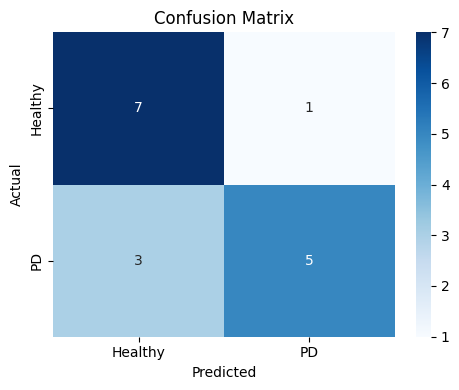


✅ Model saved to: C:/Users/isgis/OneDrive/Desktop/NeuroKey/models/xgb_pd_model.pkl
✅ Scaler saved to: C:/Users/isgis/OneDrive/Desktop/NeuroKey/models/scaler.pkl


In [4]:
# ✅ Step 3: Train Model and Save
model_save_path = 'C:/Users/isgis/OneDrive/Desktop/NeuroKey/models/xgb_pd_model.pkl'
scaler_save_path = 'C:/Users/isgis/OneDrive/Desktop/NeuroKey/models/scaler.pkl'

train_and_evaluate(file_path, model_save_path, scaler_save_path)


In [6]:
# ✅ Step 4: Load Trained Model
model = load_model(model_save_path)

✅ SHAP summary plot saved to: C:/Users/isgis/OneDrive/Desktop/NeuroKey/outputs/shap_plots/shap.png


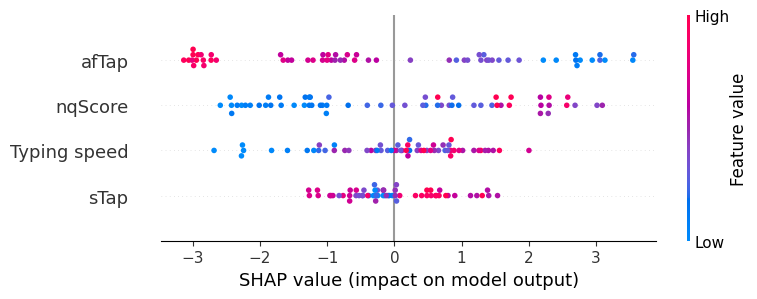

In [7]:
# ✅ Step 5: SHAP Global Explanation
explain_model(model, X_train, feature_names, save_summary_path='C:/Users/isgis/OneDrive/Desktop/NeuroKey/outputs/shap_plots/shap.png')

In [9]:
sample = pd.DataFrame([{
    'nqScore': 2.1,
    'Typing speed': 4.2,
    'afTap': 2.9,
    'sTap': 2.7
}])

scaled_sample = scaler.transform(sample)
print("Predicted class:", model.predict(scaled_sample))
print("Predicted probability:", model.predict_proba(scaled_sample)[0][1])


Predicted class: [1]
Predicted probability: 0.7515125
